In [1]:
import sys
import cv2
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

(300, 200)


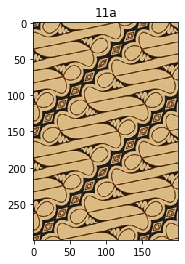

In [2]:
citra = '11a'
imageN = cv2.imread('Testing/'+citra+'.jpg')
imageG = cv2.cvtColor(imageN, cv2.COLOR_BGR2GRAY)
(thresh, image) = cv2.threshold(imageG, 127, 255, cv2.THRESH_BINARY)
print(image.shape)
plt.title(citra)
plt.imshow(imageN[:,:,::-1])
# cv2.imshow('ori nih',image)
# if cv2.waitKey(0) & 0xFF == 27:
#     cv2.destroyAllWindows()

In [3]:
# pilih = input()
pilih = 'k'

In [4]:
def kirsch(image):
    x,y = image.shape
    list=[]
    kirsch = np.zeros((x,y))
    for i in range(2,x-1):
        for j in range(2,y-1):
            
            #utara
            k1 = np.square((5) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            
            #timur laut
            k2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            
            #timur
            k3 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            
            #tenggara
            k4 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            
            #selatan
            k5 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            
            #barat daya
            k6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            
            #barat
            k7 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] + 
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            
            #barat laut
            k8 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            
            list=[k1, k2, k3, k4, k5, k6, k7, k8]
            kirsch[i,j]= int(np.sqrt(max(list)))
                         
    for i in range(x):
        for j in range(y):
            if kirsch[i,j]>127:
                kirsch[i,j]=255
            else:
                kirsch[i,j]=0
    return kirsch

In [5]:
def robinson(image):
    m,n = image.shape
    list=[]
    robinson = np.zeros((m,n))
    for i in range(2,m-1):
        for j in range(2,n-1):
            
            #utara
            r1 = np.square(1 * image[i - 1, j - 1] + 2 * image[i - 1, j] + 1 * image[i - 1, j + 1] -
                  1 * image[i + 1, j - 1] - 2 * image[i + 1, j] - 1 * image[i + 1, j + 1])
            
            #timur laut
            r2 = np.square(1 * image[i - 1, j] + 2 * image[i - 1, j + 1] -
                  1 * image[i, j - 1] + 1 * image[i, j + 1] - 2 * image[i + 1, j - 1] - 1 * image[i + 1, j])
            
            #timur
            r3 = np.square((-1) * image[i - 1, j - 1] + 1 * image[i - 1, j + 1] - 2 * image[i, j - 1] +
                  2 * image[i, j + 1] - 1 * image[i + 1, j - 1] + 1 * image[i + 1, j + 1])
            
            #tenggara
            r4 = np.square((-2) * image[i - 1, j - 1] - 1 * image[i - 1, j] - 1 * image[i, j - 1] + 
                  1 * image[i, j + 1] + 1 * image[i + 1, j] + 2 * image[i + 1, j + 1])
            
            #selatan
            r5 = np.square((-1) * image[i - 1, j - 1] - 2 * image[i - 1, j] - 1 * image[i - 1, j + 1] +
                  1 * image[i + 1, j - 1] + 2 * image[i + 1, j] + 1 * image[i + 1, j + 1])
            
            #barat daya
            r6 = np.square((-1) * image[i - 1, j] - 2 * image[i - 1, j + 1] + 1 * image[i, j - 1] - 
                  1 * image[i, j + 1] + 2 * image[i + 1, j - 1] + 1 * image[i + 1, j])
            
            #barat
            r7 = np.square(1 * image[i - 1, j - 1] - 1 * image[i - 1, j + 1] + 2 * image[i, j - 1] - 
                  2 * image[i, j + 1] + 1 * image[i + 1, j - 1] - 1 * image[i + 1, j + 1])
            
            #barat laut
            r8 = np.square(2 * image[i - 1, j - 1] + 1 * image[i - 1, j] + 1 * image[i, j - 1] - 
                  1 * image[i, j + 1] - 1 * image[i + 1, j] - 2 * image[i + 1, j + 1])

            list=[r1, r2, r3, r4, r5, r6, r7, r8]
            robinson[i,j]= int(np.sqrt(max(list)))
                         
    for i in range(m):
        for j in range(n):
            if robinson[i,j]>127:
                robinson[i,j]=255
            else:
                robinson[i,j]=0
    return robinson

<h1> MOMENT CITRA </h1>

In [6]:
if pilih == 'k':
    gambar = np.array(kirsch(image))
elif pilih == 'r':
    gambar = np.array(robinson(image))
    
m,n = gambar.shape
print(m, n)

hasil_00 = []
hasil_10 = []
hasil_01 = []

for i in range(m):
    x = (i+1) ** 0
    for j in range(n):
        y = (j+1) ** 0
        M00 = x * y * gambar[i,j]
        hasil_00.append(M00)

moment_00 = sum(hasil_00)

for i in range(m):
    x = (i+1) ** 1
    for j in range(n):
        y = (j+1) ** 0
        M10 = x * y * gambar[i,j]
        hasil_10.append(M10)

moment_10 = sum(hasil_10)

for i in range(m):
    x = (i+1) ** 0
    for j in range(n):
        y = (j+1) ** 1
        M01 = x * y * gambar[i,j]
        hasil_01.append(M01)

moment_01 = sum(hasil_01)

print("Moment Citra p,q (0,0) : "+str(moment_00))
print("Moment Citra p,q (1,0) : "+str(moment_10))
print("Moment Citra p,q (0,1) : "+str(moment_01))
        

300 200
Moment Citra p,q (0,0) : 6927075.0
Moment Citra p,q (1,0) : 1055470245.0
Moment Citra p,q (0,1) : 701998170.0


<h1> X & Y MEAN </h1>

In [7]:
Xmean = moment_10/moment_00
Ymean = moment_01/moment_00

print("X mean : " + str(Xmean))
print("Y mean : " + str(Ymean))

X mean : 152.36882017301676
Y mean : 101.34121111724646


<h1> CENTRAL MOMENT CITRA </h1>

In [8]:
hasilCM_00 = []
hasilCM_01 = []
hasilCM_10 = []
hasilCM_11 = []

for i in range(m):
    x = (i+1 - Xmean) ** 0
    for j in range(n):
        y = (j+1 - Ymean) ** 0
        CM00 = x * y * gambar[i,j]
        hasilCM_00.append(CM00)
        
Cmoment_00 = sum(hasilCM_00)

for i in range(m):
    x = (i+1 - Xmean) ** 0
    for j in range(n):
        y = (j+1 - Ymean) ** 1
        CM01 = x * y * gambar[i,j]
        hasilCM_01.append(CM01)
        
Cmoment_01 = sum(hasilCM_01)

for i in range(m):
    x = (i+1 - Xmean) ** 1
    for j in range(n):
        y = (j+1 - Ymean) ** 0
        CM10 = x * y * gambar[i,j]
        hasilCM_10.append(CM10)
        
Cmoment_10 = sum(hasilCM_10)

for i in range(m):
    x = (i+1 - Xmean) ** 1
    for j in range(n):
        y = (j+1 - Ymean) ** 1
        CM11 = x * y * gambar[i,j]
        hasilCM_11.append(CM11)
        
Cmoment_11 = sum(hasilCM_11)

print("Central Moment Citra p,q (0,0) : "+str(Cmoment_00))
print("Central Moment Citra p,q (0,1) : "+str(Cmoment_01))
print("Central Moment Citra p,q (1,0) : "+str(Cmoment_10))
print("Central Moment Citra p,q (1,1) : "+str(Cmoment_11))

Central Moment Citra p,q (0,0) : 6927075.0
Central Moment Citra p,q (0,1) : -1.8657592590898275e-06
Central Moment Citra p,q (1,0) : 6.606511306017637e-06
Central Moment Citra p,q (1,1) : -579741631.5168461


In [9]:
hasilCM_02 = []
hasilCM_20 = []
hasilCM_12 = []
hasilCM_21 = []

for i in range(m):
    x = (i+1 - Xmean) ** 0
    for j in range(n):
        y = (j+1 - Ymean) ** 2
        CM02 = x * y * gambar[i,j]
        hasilCM_02.append(CM02)
        
Cmoment_02 = sum(hasilCM_02)

for i in range(m):
    x = (i+1 - Xmean) ** 2
    for j in range(n):
        y = (j+1 - Ymean) ** 0
        CM20 = x * y * gambar[i,j]
        hasilCM_20.append(CM20)
        
Cmoment_20 = sum(hasilCM_20)

for i in range(m):
    x = (i+1 - Xmean) ** 1
    for j in range(n):
        y = (j+1 - Ymean) ** 2
        CM12 = x * y * gambar[i,j]
        hasilCM_12.append(CM12)
        
Cmoment_12 = sum(hasilCM_12)

for i in range(m):
    x = (i+1 - Xmean) ** 2
    for j in range(n):
        y = (j+1 - Ymean) ** 1
        CM21 = x * y * gambar[i,j]
        hasilCM_21.append(CM21)
        
Cmoment_21 = sum(hasilCM_21)

print("Central Moment Citra p,q (0,2) : "+str(Cmoment_02))
print("Central Moment Citra p,q (2,0) : "+str(Cmoment_20))
print("Central Moment Citra p,q (1,2) : "+str(Cmoment_12))
print("Central Moment Citra p,q (2,1) : "+str(Cmoment_21))

Central Moment Citra p,q (0,2) : 22530853010.109196
Central Moment Citra p,q (2,0) : 51356959656.62577
Central Moment Citra p,q (1,2) : 78599353636.31262
Central Moment Citra p,q (2,1) : 14825230529.006529


In [10]:
hasilCM_03 = []
hasilCM_30 = []

for i in range(m):
    x = (i+1 - Xmean) ** 0
    for j in range(n):
        y = (j+1 - Ymean) ** 3
        CM03 = x * y * gambar[i,j]
        hasilCM_03.append(CM03)
        
Cmoment_03 = sum(hasilCM_03)

for i in range(m):
    x = (i+1 - Xmean) ** 3
    for j in range(n):
        y = (j+1 - Ymean) ** 0
        CM30 = x * y * gambar[i,j]
        hasilCM_30.append(CM30)
        
Cmoment_30 = sum(hasilCM_30)

print("Central Moment Citra p,q (0,3) : "+str(Cmoment_03))
print("Central Moment Citra p,q (3,0) : "+str(Cmoment_30))

Central Moment Citra p,q (0,3) : 3581810159.103975
Central Moment Citra p,q (3,0) : -34863038324.738846


<h1> NORMALIZED CENTRAL MOMENT </h1>

In [11]:
gamma11 = ((1 + 1) / 2) + 1
gamma02 = ((0 + 2) / 2) + 1
gamma12 = ((1 + 2) / 2) + 1
gamma03 = ((0 + 3) / 2) + 1

NCM11 = Cmoment_11 / (Cmoment_00**gamma11)
NCM02 = Cmoment_02 / (Cmoment_00**gamma02)
NCM20 = Cmoment_20 / (Cmoment_00**gamma02)
NCM12 = Cmoment_12 / (Cmoment_00**gamma12)
NCM21 = Cmoment_21 / (Cmoment_00**gamma12)
NCM03 = Cmoment_03 / (Cmoment_00**gamma03)
NCM30 = Cmoment_30 / (Cmoment_00**gamma03)

print("Normalized Central Moment p,q (1,1) : " + str(NCM11))
print("Normalized Central Moment p,q (0,2) : " + str(NCM02))
print("Normalized Central Moment p,q (2,0) : " + str(NCM20))
print("Normalized Central Moment p,q (1,2) : " + str(NCM12))
print("Normalized Central Moment p,q (2,1) : " + str(NCM21))
print("Normalized Central Moment p,q (0,3) : " + str(NCM03))
print("Normalized Central Moment p,q (3,0) : " + str(NCM30))

Normalized Central Moment p,q (1,1) : -1.2081885309915746e-05
Normalized Central Moment p,q (0,2) : 0.0004695456858781743
Normalized Central Moment p,q (2,0) : 0.0010702852144909183
Normalized Central Moment p,q (1,2) : 6.223636943590326e-07
Normalized Central Moment p,q (2,1) : 1.1738881829041051e-07
Normalized Central Moment p,q (0,3) : 2.8361411385484817e-08
Normalized Central Moment p,q (3,0) : -2.7605175264877556e-07


<h1> GEOMETRIC INVARIANT MOMENT </h1>

In [12]:
fitur_bentuk = []

M1 = NCM20 + NCM02
M2 = (NCM20 + NCM20)**2 + (2*NCM02)**2
M3 = (NCM30 - NCM12)**2 + (3*NCM21 - NCM03)**2
M4 = (NCM30 + NCM12)**2 + (NCM21 + NCM03)**2
M5 = (NCM30 - 3*NCM12) * (NCM30 + NCM12) * ((NCM30 + NCM12)**2 - 3*(NCM21 + NCM03)**2) + (3*NCM21 - NCM03) * (NCM21 + NCM03) * (3*(NCM30 + NCM12)**2 - (NCM21 + NCM03)**2)
M6 = (NCM20 - NCM02) * ((NCM30 + NCM12)**2 - 3*(NCM21 + NCM03)**2) + 4*NCM11 * (NCM30 + NCM12) * (NCM21 + NCM03)
M7 = (3*NCM21 - NCM03) * (NCM30 + NCM12) * ((NCM30 + NCM12)**2 - 3*(NCM21 + NCM03)**2) + (3*NCM12 - NCM30) * (NCM21 + NCM03) * (3*(NCM30 + NCM12)**2 - (NCM21 + NCM03)**2)

print("M1 = " + str(M1))
print("M2 = " + str(M2))
print("M3 = " + str(M3))
print("M4 = " + str(M4))
print("M5 = " + str(M5))
print("M6 = " + str(M6))
print("M7 = " + str(M7))

fitur_bentuk = [M1, M2, M3, M4, M5, M6, M7]

M1 = 0.0015398309003690925
M2 = 5.463934365938704e-06
M3 = 9.12000021609046e-13
M4 = 1.4117509042170467e-13
M5 = -2.5735440251692194e-26
M6 = 3.132377216127482e-17
M7 = 1.1205396248591227e-25


<h1> DATABASE DATA TRAINING </h1>

In [13]:
# con = sqlite3.connect('database.db')
# csr = con.cursor()
# csr.execute("CREATE TABLE IF NOT EXISTS 'kirsch' ('citra' VARCHAR(50), 'm1' INT,'m2' INT,'m3' INT,'m4' INT,'m5' INT,'m6' INT,'m7' INT,'jenis' VARCHAR(50))")
# csr.execute("CREATE TABLE IF NOT EXISTS 'robinson' ('citra' VARCHAR(50), 'm1' INT,'m2' INT,'m3' INT,'m4' INT,'m5' INT,'m6' INT,'m7' INT,'jenis' VARCHAR(50))")
# csr.execute("CREATE TABLE IF NOT EXISTS 'Hasil_Kirsch' ('citra' VARCHAR(50), 'm1' INT,'m2' INT,'m3' INT,'m4' INT,'m5' INT,'m6' INT,'m7' INT,'jenis' VARCHAR(50))")
# csr.execute("CREATE TABLE IF NOT EXISTS 'Hasil_Robinson' ('citra' VARCHAR(50), 'm1' INT,'m2' INT,'m3' INT,'m4' INT,'m5' INT,'m6' INT,'m7' INT,'jenis' VARCHAR(50))")

<h3> RE-FRESH DATABASE </h3>

In [14]:
# file_data_k = pd.read_csv('kirsch.csv')
# file_data_r = pd.read_csv('robinson.csv')

# tb_kirsch = []
# tb_robinson = []

# for i,j in file_data_k.iterrows():
#     if [j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8]] not in tb_kirsch:
#         tb_kirsch.append([j[0],j[1],j[2],j[3] ,j[4],j[5],j[6],j[7],j[8]])

# for i,j in file_data_r.iterrows():
#     if [j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8]] not in tb_robinson:
#         tb_robinson.append([j[0],j[1],j[2],j[3] ,j[4],j[5],j[6],j[7],j[8]])
        
# for index,i in enumerate(tb_kirsch):
#     csr.execute("INSERT INTO kirsch VALUES ('"+str(i[0])+"',"+str(i[1])+","+str(i[2])+","+str(i[3])+","+str(i[4])+","+str(i[5])+","+str(i[6])+","+str(i[7])+",'"+str(i[8])+"')")

# for index,i in enumerate(tb_robinson):
#     csr.execute("INSERT INTO robinson VALUES ('"+str(i[0])+"',"+str(i[1])+","+str(i[2])+","+str(i[3])+","+str(i[4])+","+str(i[5])+","+str(i[6])+","+str(i[7])+",'"+str(i[8])+"')")

<h3> INSERT DATA KE TABEL KIRSCH </h3>

In [15]:
# if pilih=='k':
#     csr.execute("INSERT INTO kirsch VALUES ('"+str(citra)+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", 'Non-Parang Rusak')")
# elif pilih == 'r' :
#     csr.execute("INSERT INTO robinson VALUES ('"+citra+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", 'Parang Rusak')")

<h3> INSERT DATA KE TABEL ROBINSON </h3>

<h3> FITUR BENTUK dari ED KIRSCH </h3>

In [16]:
# if pilih == 'k':

#     file = pd.read_sql_query("SELECT * FROM KIRSCH", con)
#     file.to_csv('kirsch.csv', index = False)
    
# elif pilih =='r' :

#     file = pd.read_sql_query("SELECT * FROM ROBINSON", con)
#     file.to_csv('robinson.csv', index = False)

In [17]:
file_data_k = pd.read_csv('kirsch.csv')
file_data_k

,citra,m1,m2,m3,m4,m5,m6,m7,jenis
0,1,0.001667,0.000006,1.120000e-12,1.050000e-12,-4.260000e-25,-1.290000e-15,-1.050000e-24,1
1,1a,0.001666,0.000006,1.240000e-12,1.150000e-12,-2.180000e-26,-1.240000e-15,1.300000e-24,1
2,1b,0.001664,0.000006,1.550000e-12,1.150000e-12,-2.630000e-25,-1.410000e-15,-1.470000e-24,1
3,1c,0.001550,0.000005,1.160000e-13,1.400000e-12,5.270000e-25,-3.710000e-16,5.890000e-25,1
4,1d,0.001665,0.000006,1.170000e-13,1.180000e-12,-2.060000e-25,1.170000e-16,1.460000e-24,1
...,...,...,...,...,...,...,...,...,...
110,23,0.001122,0.000003,1.210000e-12,1.980000e-12,1.570000e-24,7.120000e-16,1.690000e-24,0
111,23a,0.001107,0.000003,7.910000e-13,1.530000e-12,7.630000e-25,4.490000e-16,-8.350000e-25,0
112,23b,0.001103,0.000003,6.670000e-13,9.970000e-13,3.920000e-25,3.040000e-16,5.460000e-25,0
113,23c,0.000994,0.000002,2.860000e-13,9.000000e-13,-2.450000e-25,-1.300000e-16,-2.710000e-25,0


<h3> FITUR BENTUK dari ED ROBINSON </h3>

In [18]:
# csr.execute("SELECT * FROM robinson ")

# rob = []
# for row in csr.fetchall():
#     rob.append(row)

# print(rob)

In [19]:
# file = pd.read_sql_query("SELECT * FROM ROBINSON", con)
# file.to_csv('robinson.csv', index = False)

In [20]:
file_data_r = pd.read_csv('robinson.csv')
file_data_r

,citra,m1,m2,m3,m4,m5,m6,m7,jenis
0,1,0.001761,0.000007,2.080000e-12,1.510000e-12,-1.960000e-25,-1.830000e-15,-2.590000e-24,1
1,1a,0.001760,0.000007,2.000000e-12,1.620000e-12,4.840000e-25,-1.800000e-15,2.740000e-24,1
2,1b,0.001759,0.000007,2.720000e-12,1.660000e-12,3.610000e-25,-1.950000e-15,-3.400000e-24,1
3,1c,0.001637,0.000005,4.280000e-13,2.050000e-12,-7.530000e-25,-4.240000e-16,1.070000e-24,1
4,1d,0.001760,0.000007,1.120000e-13,1.640000e-12,8.030000e-26,2.610000e-16,3.090000e-24,1
...,...,...,...,...,...,...,...,...,...
110,23,0.001165,0.000003,1.520000e-12,2.530000e-12,2.260000e-24,9.320000e-16,2.900000e-24,0
111,23a,0.001150,0.000003,9.970000e-13,1.970000e-12,1.110000e-24,5.800000e-16,-1.460000e-24,0
112,23b,0.001145,0.000003,8.290000e-13,1.310000e-12,5.300000e-25,3.960000e-16,9.440000e-25,0
113,23c,0.001031,0.000002,3.020000e-13,1.050000e-12,-4.220000e-25,-1.800000e-16,-2.460000e-25,0


In [21]:
# csr.execute("DELETE FROM ROBINSON")
# csr.execute("DELETE FROM KIRSCH")

In [22]:
# from sklearn import datasets

# iris = datasets.load_iris()

# X = iris.data[:, :2]
# y = iris.target

# y

<h1> TRAIN DATA K-NN </h1>

In [23]:
dataK = np.array(file_data_k)
dataR = np.array(file_data_r)

X1 = dataK[:, 1:8]
X1 = X1.astype('float64')
y1 = dataK[:, -1]
y1 = y1.astype('float64')

X2 = dataR[:, 1:8]
X2 = X2.astype('float64')
y2 = dataR[:, -1]
y2 = y2.astype('float64')

<h1> K-NN CLASSIFIER </h1>

In [24]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    
    def __init__(self, k=9):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def prediksi(self, x):
        distance = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_distance = np.argsort(distance)[:self.k]
        k_nearest_label = [self.y_train[i] for i in k_distance]
        most_common = Counter(k_nearest_label).most_common(1)
        return most_common[0][0]
        
    def predict(self, X):
        prediksi = [self.prediksi(x) for x in X]
        return np.array(prediksi)

<h3> UPDATE DATABASE DATA TEST </h3>

In [25]:
# con = sqlite3.connect('database.db')
# csr = con.cursor()

# file_data_hk = pd.read_csv('Hasil Kirsch.csv')
# file_data_hr = pd.read_csv('Hasil Robinson.csv')

# tb_hkirsch = []
# tb_hrobinson = []

# for i,j in file_data_hk.iterrows():
#     if [j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8]] not in tb_hkirsch:
#         tb_hkirsch.append([j[0],j[1],j[2],j[3] ,j[4],j[5],j[6],j[7],j[8]])

# for i,j in file_data_hr.iterrows():
#     if [j[0],j[1],j[2],j[3],j[4],j[5],j[6],j[7],j[8]] not in tb_hrobinson:
#         tb_hrobinson.append([j[0],j[1],j[2],j[3] ,j[4],j[5],j[6],j[7],j[8]])
        
# for index,i in enumerate(tb_hkirsch):
#     csr.execute("INSERT INTO hasil_kirsch VALUES ('"+str(i[0])+"',"+str(i[1])+","+str(i[2])+","+str(i[3])+","+str(i[4])+","+str(i[5])+","+str(i[6])+","+str(i[7])+",'"+str(i[8])+"')")

# for index,i in enumerate(tb_hrobinson):
#     csr.execute("INSERT INTO hasil_robinson VALUES ('"+str(i[0])+"',"+str(i[1])+","+str(i[2])+","+str(i[3])+","+str(i[4])+","+str(i[5])+","+str(i[6])+","+str(i[7])+",'"+str(i[8])+"')")

In [26]:
k=11

if pilih == 'k':
    
    clf = KNN(k)
    clf.fit(X1, y1)
    prediksi = clf.predict([fitur_bentuk])

    print('========= KIRSCH =========')    
    if prediksi == 0:
        kelas = '0'
        csr.execute("INSERT INTO Hasil_Kirsch VALUES ('"+citra+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", '"+kelas+"')")
        print('Prediksi : Non-Parang Rusak')
    else :
        kelas = '1'
        csr.execute("INSERT INTO Hasil_Kirsch VALUES ('"+citra+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", '"+kelas+"')")
        print('Prediksi : Parang Rusak')
        
elif pilih == 'r':
    
    clf = KNN(k)
    clf.fit(X2, y2)
    prediksi = clf.predict([fitur_bentuk])
    
    print('========= ROBINSON =========')
    if prediksi == 0:
        kelas = '0'
        csr.execute("INSERT INTO hasil_robinson VALUES ('"+citra+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", '"+kelas+"')")
        print('Prediksi : Non-Parang Rusak')
        print(prediksi)
    else :
        kelas = '1'
        csr.execute("INSERT INTO hasil_robinson VALUES ('"+citra+"', "+str(fitur_bentuk[0])+", "+str(fitur_bentuk[1])+", "+str(fitur_bentuk[2])+", "+str(fitur_bentuk[3])+", "+str(fitur_bentuk[4])+", "+str(fitur_bentuk[5])+", "+str(fitur_bentuk[6])+", '"+kelas+"')")
        print('Prediksi : Parang Rusak')
        print(prediksi)

prediksi

In [27]:
# if pilih == 'k':

# #     csr.execute("DELETE FROM HASIL_KIRSCH")

#     file = pd.read_sql_query("SELECT * FROM Hasil_Kirsch", con)
#     file.to_csv('Hasil Kirsch.csv', index = False)

#     file_data_hk = pd.read_csv('Hasil Kirsch.csv')
    
# elif pilih == 'r':
    
# #     csr.execute("DELETE FROM HASIL_ROBINSON")

#     file = pd.read_sql_query("SELECT * FROM hasil_robinson", con)
#     file.to_csv('Hasil Robinson.csv', index = False)

#     file_data_hr = pd.read_csv('Hasil Robinson.csv')

In [28]:
# file_data_hk

In [29]:
# file_data_hr

<h1> Hasil Pre-Processing Citra </h1>

In [30]:
# output1 = kirsch(imageG)
# output2 = robinson(image)
# cv2.imshow('Original Image', imageN)
# cv2.imshow('Grayscale Image', imageG)
# cv2.imshow('Binary Image', image)
# cv2.imshow('Kirsch', output1)
# cv2.imshow('Robinson', output2)
# if cv2.waitKey(0) & 0xFF == 27:
#     cv2.destroyAllWindows()

In [38]:
# dataK = np.array(file_data_k)
# dataR = np.array(file_data_r)

# # X_train = dataK[:, 1:8]
# # X_train = X_train.astype('float64')
# # y_train = dataK[:, -1]
# # y_train = y_train.astype('float64')

# X_train = dataR[:, 1:8]
# X_train = X_train.astype('float64')
# y_train = dataR[:, -1]
# y_train = y_train.astype('float64')

# # dataHK = pd.read_csv("Hasil Kirsch.csv")
# # dataHK = np.array(dataHK)

# dataHR = pd.read_csv("Hasil Robinson.csv")
# dataHR = np.array(dataHR)

# X_test = dataHR[:, 1:8]
# X_test = X_test.astype('float64')
# y_test = dataHR[:, -1]
# y_test = y_test.astype('float64')

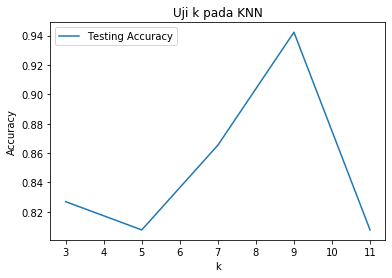

In [41]:
# neighbors = np.array([3,5,7,9,11])
# train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

# for i, k in enumerate(neighbors):
#     knn = KNeighborsClassifier(n_neighbors = k)

#     knn.fit(X_train, y_train)
    
#     train_accuracy[i] = knn.score(X_train, y_train)

#     test_accuracy[i] = knn.score(X_test, y_test)

# plt.title('Uji k pada KNN')
# plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
# plt.legend()
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.show()